In [61]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score
from sklearn import metrics
import statsmodels.formula.api as smf
from sklearn.neighbors import KNeighborsClassifier

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('http://localhost:8888/files/data/yelp.csv')
data.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


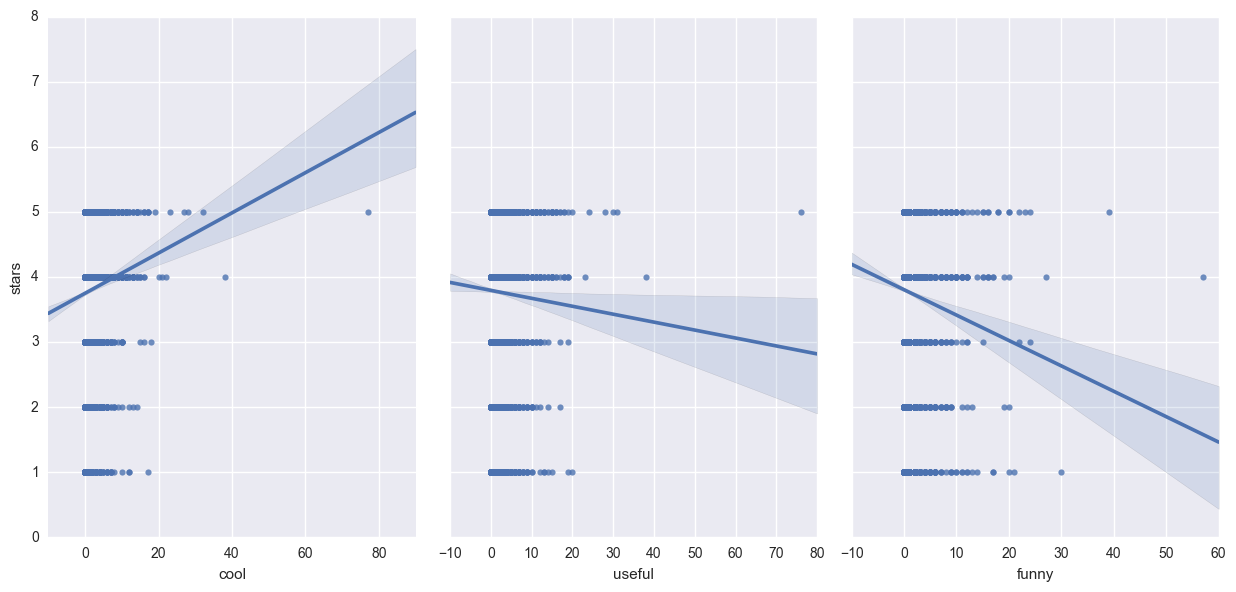

In [62]:
sns.pairplot(data, x_vars=['cool','useful','funny'], y_vars='stars', size=6, aspect=0.7, kind='reg')

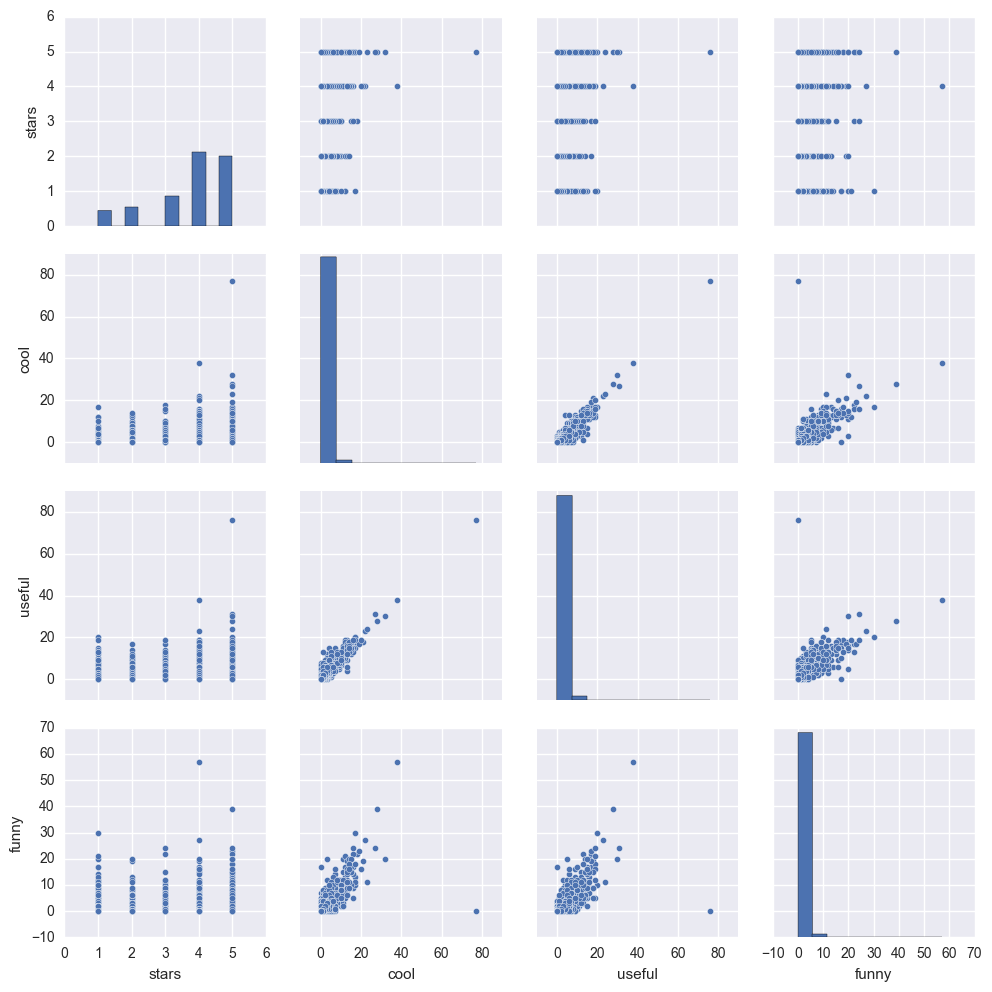

In [63]:
sns.pairplot(data)

In [64]:
data.corr()

,stars,cool,useful,funny
stars,1.000000,0.052555,-0.023479,-0.061306
cool,0.052555,1.000000,0.887102,0.764342
useful,-0.023479,0.887102,1.000000,0.723406
funny,-0.061306,0.764342,0.723406,1.000000


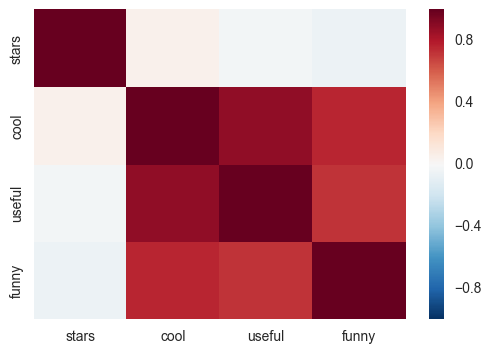

In [65]:
sns.heatmap(data.corr())

In [66]:
### STATSMODELS ###

# create a fitted model
lm = smf.ols(formula='stars ~ cool', data=data).fit()

# print the coefficients
lm.params

Intercept    3.750433
cool         0.030870
dtype: float64

In [67]:
data.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [68]:
data.shape

(10000, 10)

In [69]:
### STATSMODELS ###

# create a fitted model
lm = smf.ols(formula='stars ~ useful', data=data).fit()

# print the coefficients
lm.params

Intercept    3.794700
useful      -0.012205
dtype: float64

In [70]:
### STATSMODELS ###

# create a fitted model
lm = smf.ols(formula='stars ~ funny', data=data).fit()

# print the coefficients
lm.params

Intercept    3.804871
funny       -0.039029
dtype: float64

In [71]:
type(data)

pandas.core.frame.DataFrame

In [72]:
from sklearn.cross_validation import train_test_split
features = np.array([data.cool, data.useful, data.funny]).T
features  # 2D array

array([[2, 5, 0],
       [0, 0, 0],
       [0, 1, 0],
       ..., 
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=int64)

In [88]:
response = np.array([data.stars]).T 
response  # 1D array


array([[5],
       [5],
       [4],
       ..., 
       [4],
       [2],
       [5]], dtype=int64)

In [74]:
# step 1: split data into training set and test set
features_train, features_test, response_train, response_test = train_test_split(features, response, random_state=4)
# the random_state allows us all to get the same random numbers

In [82]:
features_train

array([[1, 6, 4],
       [1, 2, 1],
       [0, 1, 0],
       ..., 
       [0, 0, 0],
       [2, 3, 2],
       [0, 2, 0]], dtype=int64)

In [83]:
features_test

array([[1, 3, 1],
       [0, 1, 0],
       [0, 0, 0],
       ..., 
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=int64)

In [84]:
response_train

array([[3],
       [5],
       [5],
       ..., 
       [4],
       [2],
       [1]], dtype=int64)

array([[5],
       [5],
       [5],
       ..., 
       [3],
       [4],
       [3]], dtype=int64)

In [89]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(features_train, response_train)      # Note that I fit to the training
knn.score(features_test, response_test)      # and scored on the test set

C:\Users\Eugene\Anaconda2\envs\bersonenv\lib\site-packages\ipykernel\__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app


0.35320000000000001

In [102]:
X = data[['cool', 'useful', 'funny']]
y = data['stars']

In [103]:
from sklearn.cross_validation import cross_val_score
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')

In [104]:
scores

array([ 0.28657014,  0.24787606,  0.22011006,  0.17558779,  0.24274274])